In [1]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2017-10-24'
end = '2022-10-24'

# Tickers of assets
assets = ['BIL','IEF', 'LQD', 'HYG', 'EMLC', 'RINF',
          'VNQ','SPG','GDX','USO','SPY','EEM']
assets.sort()

In [4]:
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

# Calculating returns

Y = data[assets].pct_change().dropna()
Y = data.resample('M').last().pct_change().dropna()

display(Y.head())

cm=Y.corr()

[*********************100%%**********************]  12 of 12 completed


,BIL,EEM,EMLC,GDX,HYG,IEF,LQD,RINF,SPG,SPY,USO,VNQ
Date,,,,,,,,,,,,
2017-11-30,0.0547%,-0.3889%,1.5793%,-0.0445%,-0.3678%,-0.2792%,-0.1233%,0.7664%,5.3473%,3.0566%,4.9405%,2.6642%
2017-12-31,0.0744%,3.7615%,1.9770%,4.2613%,0.2458%,0.1847%,1.2204%,1.4843%,6.1762%,1.2128%,4.7079%,-0.1474%
2018-01-31,0.1313%,8.2980%,3.7408%,2.1945%,0.0458%,-2.1502%,-1.2257%,3.5702%,-4.8736%,5.6359%,8.0766%,-4.2541%
2018-02-28,0.0831%,-5.8985%,-0.7295%,-10.1053%,-0.8674%,-0.9328%,-2.2372%,0.2089%,-4.8521%,-3.6360%,-4.6995%,-7.6778%
2018-03-31,0.1301%,0.5414%,1.1717%,2.9508%,-0.2318%,1.1557%,0.5568%,-1.9919%,0.5472%,-2.7410%,5.8205%,3.8908%


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

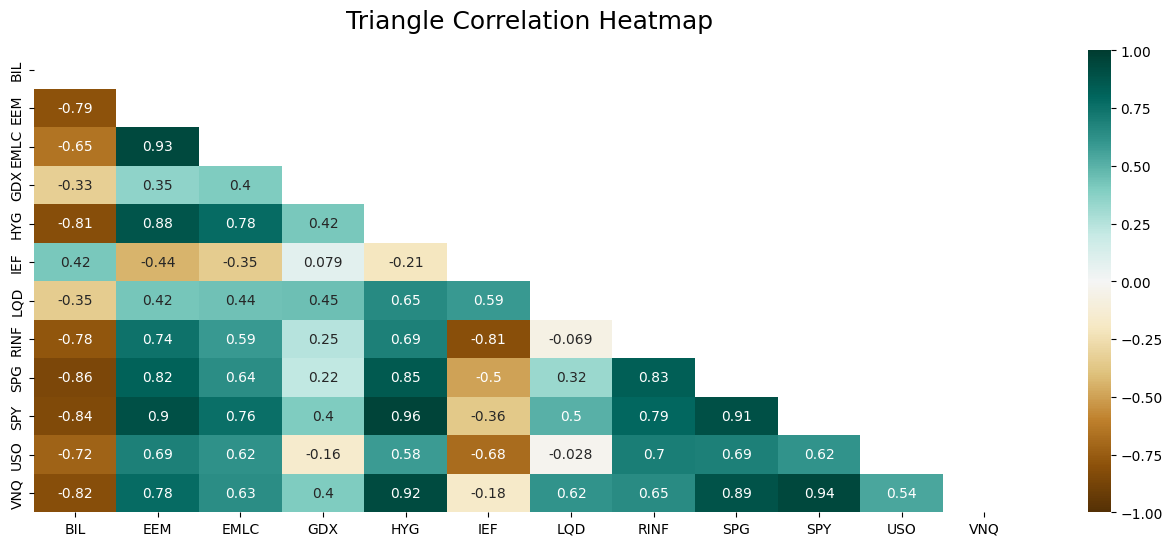

In [5]:
# Mostrando el heatmap de la matriz de correlacion triangular

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cm.corr()))
heatmap = sns.heatmap(cm.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
